In [1]:
import io
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%pwd

'c:\\Users\\Asus\\vs_code\\brain_tumor_Unet\\notebook'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Asus\\vs_code\\brain_tumor_Unet'

In [5]:
import os
import pandas as pd
import tensorflow as tf
from src.brain_tumor.logger import logging
from src.brain_tumor.config.configuration import ConfugarationManager
from src.brain_tumor.entity.config_entity import PreprocessingConfig
from src.brain_tumor.utils.Unet import unet
from src.brain_tumor.utils.common import convert_file_into_path
from src.brain_tumor.utils.data_processing import (mappable_function,mapping_fixup)

In [6]:
class DataProcessing(ConfugarationManager):

    def __init__(self, config: PreprocessingConfig):
        super().__init__()
        self.config_ = config

    def get_processing_data_path(self, dataset_type: str):
        self.dataset_type = dataset_type
        image_path = self.config_.image_path
        mask_path = self.config_.mask_path
        logging.info('preprocessing initialized')

        data_file_path = ""

        if self.dataset_type == 'train':
            data_file_path = self.config_.train_data_path
        elif self.dataset_type == 'test':
            data_file_path = self.config_.test_data_path
        elif self.dataset_type == 'val':
            data_file_path = self.config_.val_data_path
        else:
            raise ValueError("Invalid data_type. Use 'train', 'test', or 'val'.")
        logging.info(f'{self.dataset_type} file is created')

        self.image_file, self.mask_file = convert_file_into_path(data_file_path=data_file_path,
                                                                image_path=image_path,
                                                                mask_path=mask_path)

        return (self.image_file, self.mask_file)
    
    def get_processing_pipeline(self):
        data        = tf.data.Dataset.list_files(self.image_file)
        data        = data.shuffle(buffer_size=self.params_.BUFFER_SIZE,reshuffle_each_iteration=False)
        data        = data.map(mappable_function)
        data        = data.map(mapping_fixup)
        data        = data.batch(self.params_.BATCH_SIZE)
        data        = data.prefetch(tf.data.AUTOTUNE)
        
        return data

In [7]:

config = ConfugarationManager()  
path = config.get_data_processing_config()
obj = DataProcessing(config=path)
#image,mask = obj.get_data_processing('val')        
image_path,mask_path = obj.get_processing_data_path('test')        
data                 = obj.get_processing_pipeline()


In [35]:
sample = data.as_numpy_iterator().next()

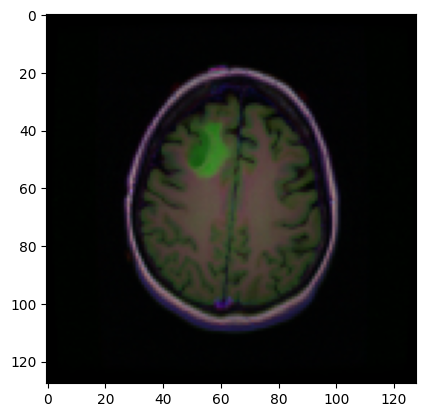

In [36]:
plt.imshow(sample[0][19])

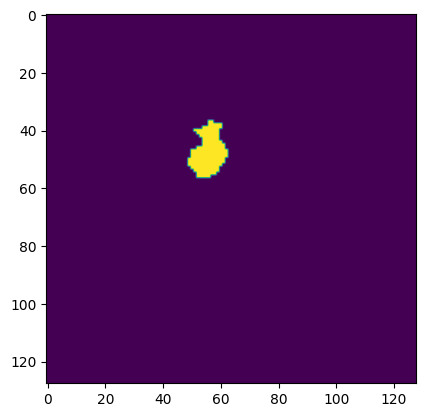

In [38]:
plt.imshow(sample[1][19])